# Transforms
Transforms are used to perform some manipulations of the data and make it suitable for training.

All TorchVision datasets have two parameters, `transform` to modify features and `target_transform` to modify the labels.

In [13]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
import numpy as np

In [7]:
ds = datasets.FashionMNIST(
    root="~/Developer/Datasets",
    train=True,
    download=True,
    transform=ToTensor(), # Convert the image to a tensor with a channel dimension
    target_transform=Lambda(lambda y: 
        torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) # One-hot encoding
)

In [12]:
zeros = torch.zeros(10, dtype=torch.float)
print(zeros)
zeros = zeros.scatter_(0, torch.tensor(0), value=1) # One-hot encoding
print(zeros)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


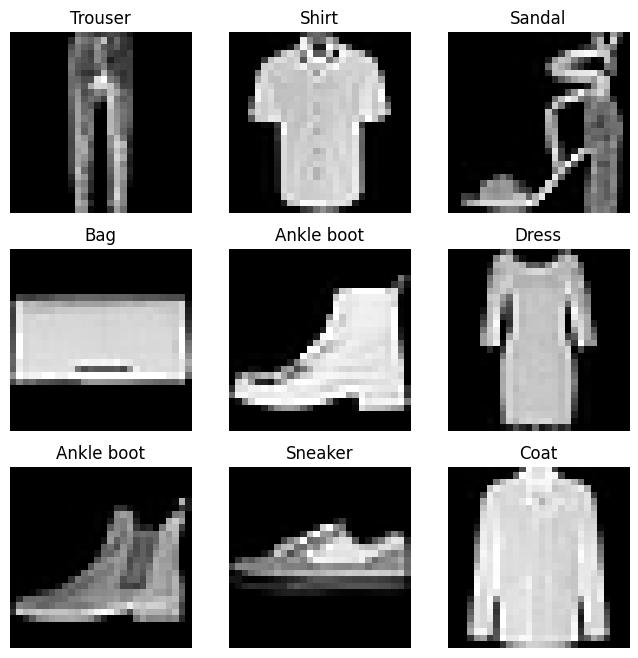

In [20]:
mnist_classes = datasets.FashionMNIST.classes
labels_map = dict(enumerate(mnist_classes))

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(ds), size=(1,)).item()
    img, label = ds[sample_idx]
    figure.add_subplot(rows, cols, i)
    print(label)
    plt.title(labels_map[np.argmax(label).item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()